In [17]:
import sys

import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
import sklearn
import sklearn.utils as utils
from sklearn import preprocessing

In [19]:
from plotting_tools import *
sys.path.insert(0, '/home/IPAMNET/lmzertuche/Documents/LIGO_ML/IPAM2021_ML')
from read_data import *

## Plotting

In [20]:
predicted_data_scaled = extractData('GPR_C+RBF+W_minibatch_v0c0.csv')
ytest = extractData('../NewRealistic/v0c0test_y.csv')
ytest = ytest[:,:-1]
ytest = utils.shuffle(ytest, random_state=42)
scaler = preprocessing.StandardScaler().fit(ytest)
predicted_data = scaler.inverse_transform(predicted_data_scaled)
ytest = ytest[:6000,:]

In [21]:
mass1 = ytest[:,0]
mass2 = ytest[:,1]

M_chirp = (mass1*mass2)**(3/5)/(mass1+mass2)**(1/5)

In [22]:
pred_mass1 = predicted_data[:,0]
pred_mass2 = predicted_data[:,1]
pred_M_chirp = (pred_mass1*pred_mass2)**(3/5)/(pred_mass1+pred_mass2)**(1/5)

/home/IPAMNET/lmzertuche/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
error = np.sqrt(((pred_M_chirp-M_chirp)/M_chirp)**2)

In [24]:
percent_error = error*100

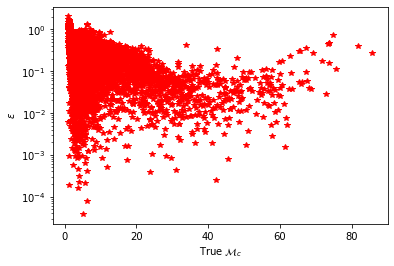

In [29]:
plt.xlabel(r'True $\mathcal{M}_c$')
plt.ylabel(r'$\epsilon$')
plt.plot(M_chirp, error, '*r')
plt.yscale('log')

In [57]:
[print(b) for b in pred_mass1 if b<0]

-0.0770457337813717


[None]

In [86]:
x = [b for b in pred_mass2 if b<0]

In [76]:
sort_index = np.argsort(error)

In [77]:
ind = sort_index[-119:]

90.79009961558131 1.23788716237025 6.880939616479228
88.83593239075759 -0.7892275656257421 nan
29.162454547546 1.1908293853077672 4.245834227963617
29.245023939232972 -0.31489191979176745 nan
48.469695911820864 1.5447028785622254 6.092143716952563
50.08737808080052 -0.020234084406310693 nan
21.989189325132507 1.1669428657028806 3.7378518407724055
24.343932444520565 -0.0978849601847136 nan
22.03000784925684 1.1500864046710144 3.7087198897404035
24.718537893063672 -0.5928704897341666 nan
20.240172484196773 1.1188798350643074 3.5243756962373602
23.282378221626736 -0.04261941565586369 nan
56.02192702611525 1.6795217902719046 6.790298531122972
58.475339196734176 -0.23917687438687008 nan
46.53974492716858 1.6668324533424619 6.269144903968052
45.84040740146207 -0.14534416623799817 nan
81.83663794901634 2.8022379937627253 10.733903840852246
84.97932909766044 -0.9080016026742159 nan
17.581455505476455 1.3481642545296417 3.710651794141017
17.12737720224628 -0.02538800364685212 nan
56.96506918596

Text(0, 0.5, 'Predicted $m_2$')

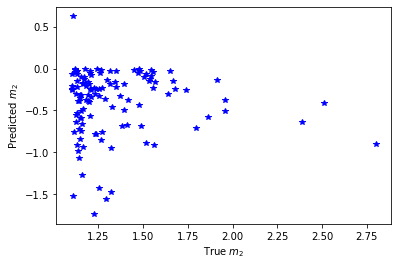

In [83]:
for i in ind:
    print(mass1[i], mass2[i], M_chirp[i])
    print(pred_mass1[i], pred_mass2[i], pred_M_chirp[i])
    plt.plot(mass2[i], pred_mass2[i], '*b')
plt.xlabel(r'True $m_2$')
plt.ylabel(r'Predicted $m_2$')

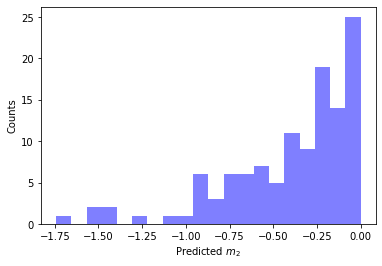

In [98]:
import matplotlib.mlab as mlab
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.ylabel(r'Counts')
plt.xlabel(r'Predicted $m_2$')
plt.show()

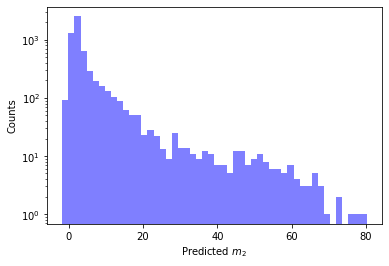

In [99]:
num_bins = 50
n, bins, patches = plt.hist(pred_mass2, num_bins, facecolor='blue', alpha=0.5)
plt.yscale('log')
plt.ylabel(r'Counts')
plt.xlabel(r'Predicted $m_2$')
plt.show()

In [43]:
mass1[128], mass2[128], M_chirp[128]
pred_mass1[128], pred_mass2[128], pred_M_chirp[128]

(15.711845604868982, -0.3002410101294464, nan)

In [37]:
pred_M_chirp[128]#, M_chirp[128]

nan

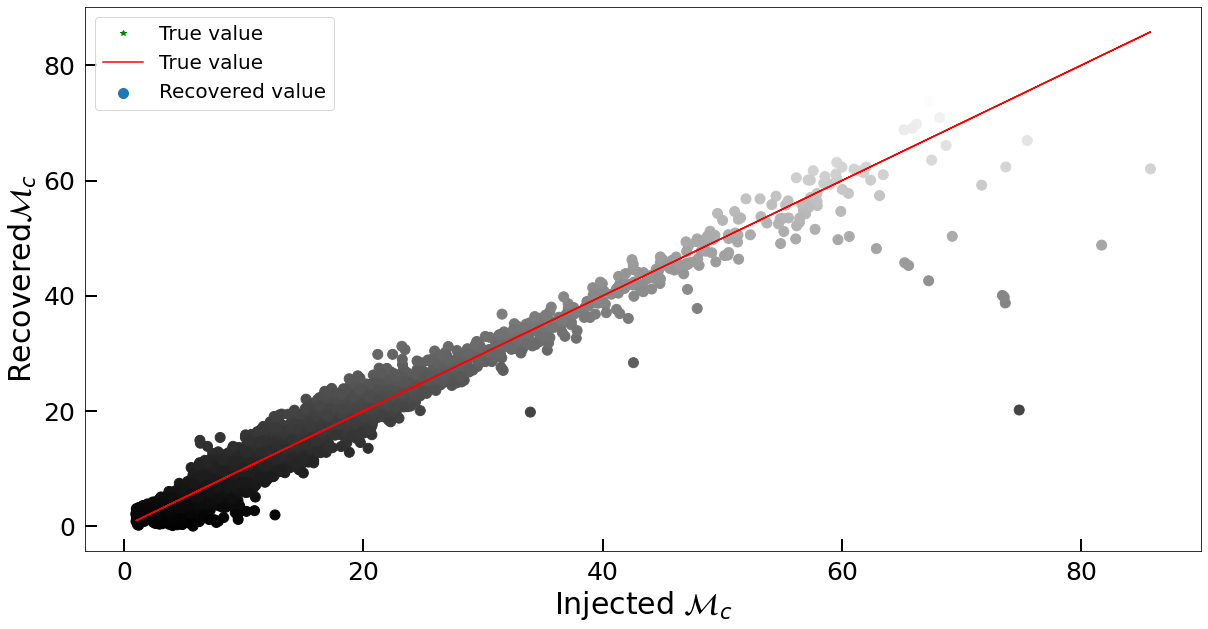

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharex=False)

axs.set_xlabel(r'Injected $\mathcal{M}_c$', fontsize=30)
axs.set_ylabel(r'Recovered$\mathcal{M}_c$', fontsize=30)
axs.tick_params(axis='x', direction='in',length=12, width=2, pad=10, labelsize=25)
axs.tick_params(axis='y', which='both', direction='in',length=12, width=2, pad=10, labelsize=25)

plt.scatter(M_chirp, pred_M_chirp, c=pred_M_chirp, s=100, cmap='gray', label='Recovered value')
#plt.plot(M_chirp[128], pred_M_chirp[128], '*g', label="True value")
plt.plot(M_chirp, M_chirp, 'r-', label="True value")
plt.legend(fontsize=20)
plt.show()

In [ ]:
plot_all(ytest, predicted_data, 'DP+RQ', 'v0c0')

In [ ]:
predicted_data_scaled = extractData('GPR_results/GPR_v0c1.csv')
ytest = extractData('../NewRealistic/v0c1test_y.csv')
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)
ytest_scaled = ytest_scaled[:2000,:]
predicted_data = scaler.inverse_transform(predicted_data_scaled)
plot_all(ytest, predicted_data, 'DP+RQ', 'v0c1')

In [ ]:
predicted_data_scaled = extractData('GPR_results/GPR_v1c0.csv')
ytest = extractData('../NewRealistic/v1c0test_y.csv')
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)
ytest_scaled = ytest_scaled[:2000,:]
predicted_data = scaler.inverse_transform(predicted_data_scaled)
plot_all(ytest, predicted_data, 'DP+RQ', 'v1c0')

In [ ]:
predicted_data_scaled = extractData('GPR_results/GPR_v1c1.csv')
ytest = extractData('../NewRealistic/v1c1test_y.csv')
scaler = preprocessing.StandardScaler().fit(ytest)
ytest_scaled = scaler.transform(ytest)
ytest_scaled = ytest_scaled[:2000,:]
predicted_data = scaler.inverse_transform(predicted_data_scaled)
plot_all(ytest, predicted_data, 'DP+RQ', 'v1c1')